In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

In [22]:
def simulate(T, sig_0, P_0, del_t):
    t = 0
    prices = [P_0]
    log_price = [np.log(P_0)]
    while t < T: 
        curr_y = log_price[-1]
        w = np.random.normal(0, 1, 1)[0]
        del_w = w*np.sqrt(del_t)
        # get sig_t    
        intgr = 0.
        curr_T = len(prices)
        if t == 0:
            sig_t = sig_0
        else:  
            for tau in range(1, curr_T):
                intgr += (g/((sig_0**2) * (tau**lamb))) * ((curr_y - log_price[-tau])**2)
            sig_t = sig_0 * np.sqrt(1.+intgr)
            print 'sig_t at t ', t, 'is: ', sig_t
        y_next = sig_t*del_w + curr_y
        log_price.append(y_next)
        prices.append(np.exp(y_next))
        t += 1
    return prices, log_price

In [3]:
import quandl
quandl.ApiConfig.api_key = "YsgeJmyZtvDmyVdYinwf"
data = quandl.get_table('WIKI/PRICES', \
                        qopts = { 'columns': ['ticker', 'date', 'close'] }, \
                        ticker = ['MSFT'], \
                        date = { 'gte': '2011-01-01', 'lte': '2016-12-31' })
print(data.shape)
data.head()

(1510, 3)


,ticker,date,close
None,,,
0,MSFT,2011-01-03,27.9800
1,MSFT,2011-01-04,28.0875
2,MSFT,2011-01-05,28.0000
3,MSFT,2011-01-06,28.8200
4,MSFT,2011-01-07,28.6000


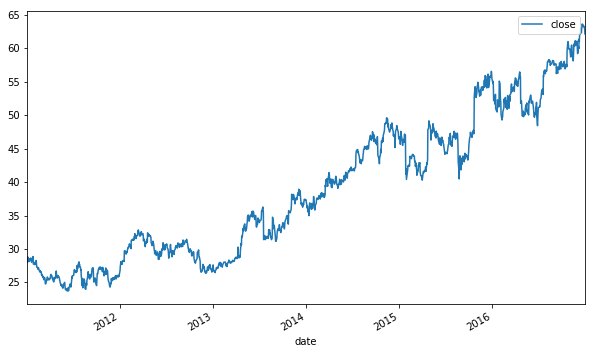

In [4]:
%matplotlib inline
import seaborn as sns
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
sns.mpl.rcParams['savefig.dpi'] = 90
data.plot(x='date', y='close')

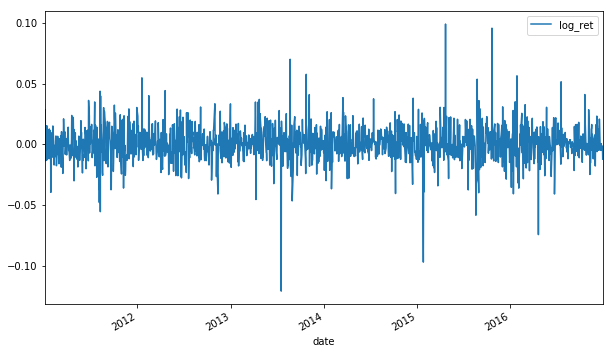

In [5]:
# plot log_returns
price = data
# log_return = log(pi/pj)
log_pj = list(np.log(price['close']))
log_pi = log_pj[1:]
log_pi.append(0)
assert len(log_pi) == len(log_pj)
price['log_ret'] = np.array(log_pi) - np.array(log_pj)
price = price[:-1]
price.plot(x='date',y = 'log_ret')

In [40]:
# simulation model setup

T = price.shape[0]-1 # number of times to sample - 1(excluding P0)
g = 0.85
lamb = 1.15
sig_0 = 0.015
P_0 = price['close'][0] # initial price
del_t = 1./252. # 1 day

prices_sim, log_price_sim = simulate(T, sig_0, P_0, del_t)
# price['prices_sim'] = prices_sim
# price.plot(x='date',y = 'prices_sim')
# print np.argwhere(np.isnan([prices_sim]))

sig_t at t  1 is:  0.015
sig_t at t  2 is:  0.0150895472583
sig_t at t  3 is:  0.0150369433691
sig_t at t  4 is:  0.0150487491822
sig_t at t  5 is:  0.0150588592906
sig_t at t  6 is:  0.0150443002729
sig_t at t  7 is:  0.0150448866266
sig_t at t  8 is:  0.0150620546249
sig_t at t  9 is:  0.0151238215506
sig_t at t  10 is:  0.0153912886462
sig_t at t  11 is:  0.0152938822217
sig_t at t  12 is:  0.0153335048219
sig_t at t  13 is:  0.0153625431086
sig_t at t  14 is:  0.0154270096401
sig_t at t  15 is:  0.015535032681
sig_t at t  16 is:  0.0156130470063
sig_t at t  17 is:  0.0153075734744
sig_t at t  18 is:  0.0154455559804
sig_t at t  19 is:  0.0157227701677
sig_t at t  20 is:  0.0157882941744
sig_t at t  21 is:  0.0155265691042
sig_t at t  22 is:  0.0153447308858
sig_t at t  23 is:  0.0153114825718
sig_t at t  24 is:  0.0152686399043
sig_t at t  25 is:  0.0152917327716
sig_t at t  26 is:  0.0152709587558
sig_t at t  27 is:  0.0152124125532
sig_t at t  28 is:  0.0152860644962
sig_t at t  

sig_t at t  287 is:  0.0156875644304
sig_t at t  288 is:  0.0155528587596
sig_t at t  289 is:  0.0156786902173
sig_t at t  290 is:  0.0155476823211
sig_t at t  291 is:  0.0154296070674
sig_t at t  292 is:  0.0154377763263
sig_t at t  293 is:  0.0155036581562
sig_t at t  294 is:  0.0157671180867
sig_t at t  295 is:  0.015742677291
sig_t at t  296 is:  0.0156521781996
sig_t at t  297 is:  0.0154399052436
sig_t at t  298 is:  0.0156646952882
sig_t at t  299 is:  0.0159546803454
sig_t at t  300 is:  0.0157197170855
sig_t at t  301 is:  0.0160493101623
sig_t at t  302 is:  0.0157644582304
sig_t at t  303 is:  0.0154796425405
sig_t at t  304 is:  0.015755767842
sig_t at t  305 is:  0.0159609009946
sig_t at t  306 is:  0.0155743580703
sig_t at t  307 is:  0.0154406866364
sig_t at t  308 is:  0.0154479297925
sig_t at t  309 is:  0.0154222792823
sig_t at t  310 is:  0.0157990022903
sig_t at t  311 is:  0.0154639908191
sig_t at t  312 is:  0.0156480775142
sig_t at t  313 is:  0.0154158646364
sig

sig_t at t  530 is:  0.0162995026979
sig_t at t  531 is:  0.0181536630458
sig_t at t  532 is:  0.019207877258
sig_t at t  533 is:  0.0192717996387
sig_t at t  534 is:  0.0200096332485
sig_t at t  535 is:  0.022766654716
sig_t at t  536 is:  0.0249229975571
sig_t at t  537 is:  0.021331405276
sig_t at t  538 is:  0.02157571735
sig_t at t  539 is:  0.0210515585358
sig_t at t  540 is:  0.0230231876747
sig_t at t  541 is:  0.0227096701316
sig_t at t  542 is:  0.0226632272137
sig_t at t  543 is:  0.0213341059306
sig_t at t  544 is:  0.0226801900494
sig_t at t  545 is:  0.0197136447166
sig_t at t  546 is:  0.0196914057933
sig_t at t  547 is:  0.0197881852025
sig_t at t  548 is:  0.018969648442
sig_t at t  549 is:  0.0196872433051
sig_t at t  550 is:  0.0191562804389
sig_t at t  551 is:  0.0186824925555
sig_t at t  552 is:  0.0182831733188
sig_t at t  553 is:  0.0188223300405
sig_t at t  554 is:  0.0190664171526
sig_t at t  555 is:  0.0195681902505
sig_t at t  556 is:  0.0198023782073
sig_t a

sig_t at t  769 is:  0.0241406622943
sig_t at t  770 is:  0.0240960866433
sig_t at t  771 is:  0.0240952648655
sig_t at t  772 is:  0.0239441692588
sig_t at t  773 is:  0.0235083181356
sig_t at t  774 is:  0.0233853373342
sig_t at t  775 is:  0.0232578946254
sig_t at t  776 is:  0.0233080852006
sig_t at t  777 is:  0.023142781434
sig_t at t  778 is:  0.023512415208
sig_t at t  779 is:  0.0235331603994
sig_t at t  780 is:  0.0233100322127
sig_t at t  781 is:  0.0235201674907
sig_t at t  782 is:  0.0227795066536
sig_t at t  783 is:  0.0228667033488
sig_t at t  784 is:  0.0224451471849
sig_t at t  785 is:  0.0222398062286
sig_t at t  786 is:  0.0221128638416
sig_t at t  787 is:  0.0221551298065
sig_t at t  788 is:  0.0220404792624
sig_t at t  789 is:  0.022697042204
sig_t at t  790 is:  0.0225454421357
sig_t at t  791 is:  0.0228406442948
sig_t at t  792 is:  0.0220914473135
sig_t at t  793 is:  0.0221201078305
sig_t at t  794 is:  0.0218792263905
sig_t at t  795 is:  0.0217404858157
sig_

sig_t at t  1156 is:  0.0351465136121
sig_t at t  1157 is:  0.0334229816477
sig_t at t  1158 is:  0.034036709263
sig_t at t  1159 is:  0.0376569569114
sig_t at t  1160 is:  0.0372003348286
sig_t at t  1161 is:  0.0367933743787
sig_t at t  1162 is:  0.0381305542423
sig_t at t  1163 is:  0.0416178049335
sig_t at t  1164 is:  0.0431335322269
sig_t at t  1165 is:  0.0420997387914
sig_t at t  1166 is:  0.0424999202015
sig_t at t  1167 is:  0.041846947814
sig_t at t  1168 is:  0.0388548156747
sig_t at t  1169 is:  0.0392463799849
sig_t at t  1170 is:  0.0381929063897
sig_t at t  1171 is:  0.0362747767043
sig_t at t  1172 is:  0.0339937861963
sig_t at t  1173 is:  0.0332451721484
sig_t at t  1174 is:  0.0321438207197
sig_t at t  1175 is:  0.0336909888726
sig_t at t  1176 is:  0.0319484649093
sig_t at t  1177 is:  0.031391066506
sig_t at t  1178 is:  0.0304014002213
sig_t at t  1179 is:  0.0295028372433
sig_t at t  1180 is:  0.0294128322705
sig_t at t  1181 is:  0.029858865285
sig_t at t  1182

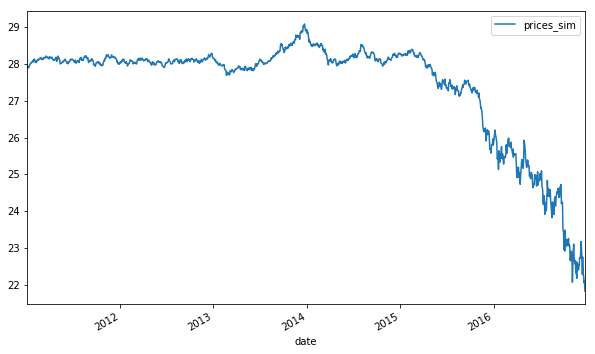

In [41]:
price['prices_sim'] = prices_sim[:len(price)]
price.plot(x='date',y = 'prices_sim')

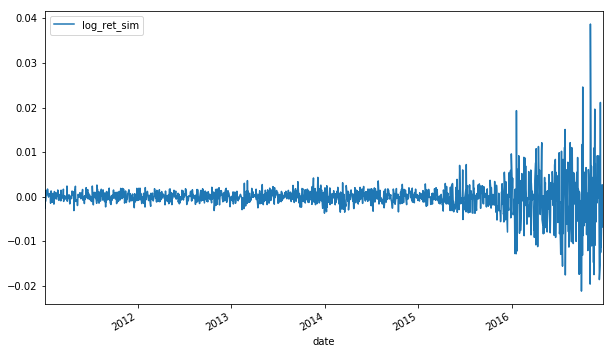

In [42]:
# plot log_returns

# log_return = log(pi/pj)
log_pj = list(np.log(price['prices_sim']))
log_pi = log_pj[1:]
log_pi.append(0)
assert len(log_pi) == len(log_pj)
price['log_ret_sim'] = np.array(log_pi) - np.array(log_pj)
price = price[:-1]
price.plot(x='date',y = 'log_ret_sim')

In [37]:
sig_0 = np.std(price['log_ret'])
mu = np.mean(price['log_ret'])

In [38]:
print (sig_0, mu)

(0.014740718116523046, 0.000541885361369232)


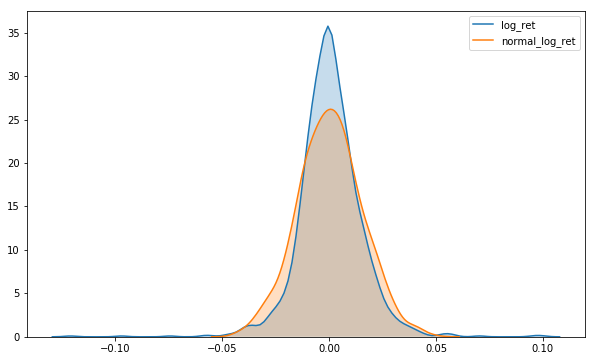

In [43]:
# check for fat tails 

price['normal_log_ret'] = list(mu+sig_0*np.random.normal(size=len(price)))

sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
sns.mpl.rcParams['savefig.dpi'] = 90

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
# sns.distplot(price['log_ret'], ax = ax)
# sns.distplot(price['normal_log_ret'],ax = ax)
sns.kdeplot(price['log_ret'],shade=True,ax=ax)
sns.kdeplot(price['normal_log_ret'], shade=True,ax=ax)

# plt.xlim(-0.1,0)

highest correlation is at index  1504 which has value:  1.0


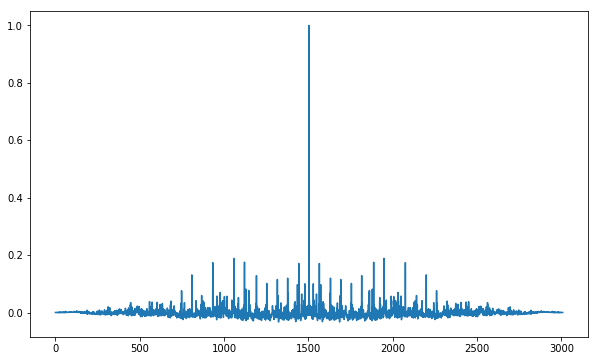

In [44]:
# test for autocorrelation - can we have correlation of 1 ??

y = price['log_ret']**2
y = y - np.mean(y)
norm = np.sum(y ** 2)
correlated = np.correlate(y, y, mode='full')/norm
idx = np.argsort(correlated)[-1]
print 'highest correlation is at index ', idx, 'which has value: ', correlated[idx]
plt.plot(correlated)

In [45]:
price.head()

,ticker,date,close,log_ret,prices_sim,log_ret_sim,normal_log_ret
None,,,,,,,
0,MSFT,2011-01-03,27.9800,0.003835,27.980000,-0.000487,0.009938
1,MSFT,2011-01-04,28.0875,-0.003120,27.966376,-0.002652,0.005649
2,MSFT,2011-01-05,28.0000,0.028865,27.892300,0.001360,0.015330
3,MSFT,2011-01-06,28.8200,-0.007663,27.930256,-0.001098,0.032458
4,MSFT,2011-01-07,28.6000,-0.013376,27.899599,-0.000467,0.002806
